In [1]:
import pandas as pd
data = pd.read_csv('height_weight.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   object 
 1   BMI     4231 non-null   float64
 2   height  4231 non-null   float64
 3   weight  4231 non-null   float64
dtypes: float64(3), object(1)
memory usage: 132.3+ KB
None


,sex,BMI,height,weight
0,M,33.36,187.96,117.933920
1,M,26.54,177.80,83.914520
2,F,32.13,154.94,77.110640
3,M,26.62,172.72,79.378600
4,F,27.13,167.64,76.203456


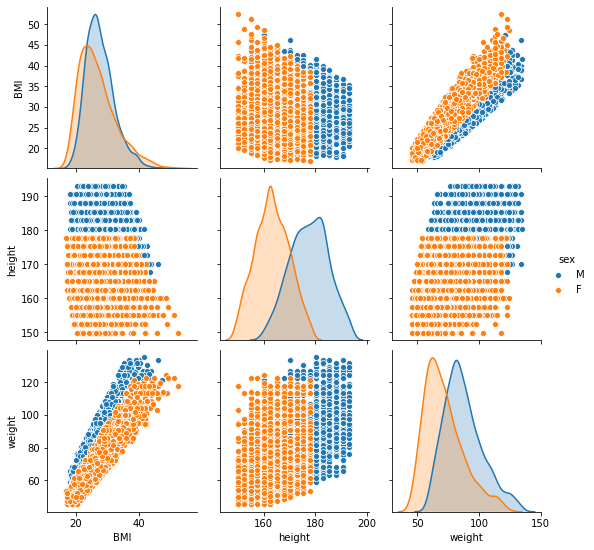

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(data,hue='sex')
plt.show()

In [3]:
data.cov()


,BMI,height,weight
BMI,27.990461,-0.800246,78.186608
height,-0.800246,99.130776,91.534073
weight,78.186608,91.534073,310.229617


Covarianza tra weight e BMI: 78.18660757544716


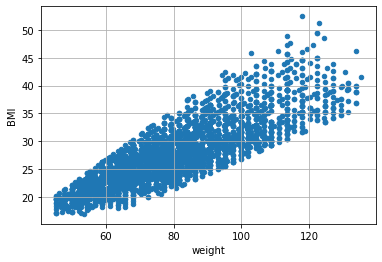

Covarianza tra weight e BMI: 312.7464303017886


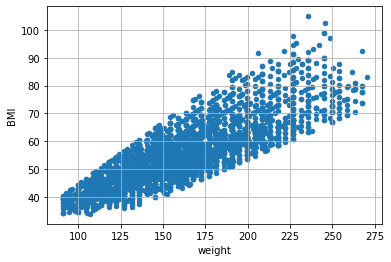

In [7]:
print("Covarianza tra weight e BMI:",data.cov()['weight']['BMI'])
data.plot.scatter('weight','BMI')
plt.grid()
plt.show()
data_mod = data.copy()
data_mod['weight']*=2
data_mod['BMI']*=2
print("Covarianza tra weight e BMI:",data_mod.cov()['weight']['BMI'])
data_mod.plot.scatter('weight','BMI')
plt.grid()
plt.show()

In [8]:

from scipy.stats import pearsonr
print("Indice di correlazione | P-value")
print(pearsonr(data['weight'],data['BMI']))
print(pearsonr(data_mod['weight'],data_mod['BMI']))

Indice di correlazione | P-value
(0.8390458923855598, 0.0)
(0.8390458923855598, 0.0)


In [10]:
print(pearsonr(data['weight'],data['BMI']))
data.corr()

(0.8390458923855598, 0.0)


,BMI,height,weight
BMI,1.000000,-0.015192,0.839046
height,-0.015192,1.000000,0.521960
weight,0.839046,0.521960,1.000000


In [11]:
from scipy.stats import spearmanr
print(spearmanr(data['weight'],data['BMI']))

SpearmanrResult(correlation=0.8426515216724353, pvalue=0.0)


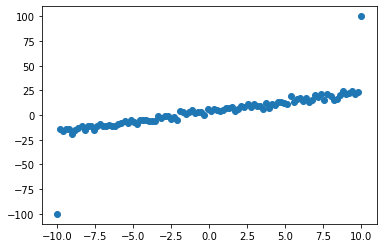

Indice di correlazione di Pearson: 0.7911764048878944
Indice di correlazione di Spearman: 0.9866426642664266


In [13]:
import numpy as np
x=np.linspace(-10,10,100) 
y=x*2+3+np.random.normal(0,2,100) #modello lineare + rumore Gaussiano

y[0]=-100 #aggiungo degli outliers
y[-1]=100

plt.scatter(x,y)
plt.show()

print("Indice di correlazione di Pearson:",pearsonr(x,y)[0])
print("Indice di correlazione di Spearman:",spearmanr(x,y)[0])

In [14]:
from scipy.stats import kendalltau
print(kendalltau(data['weight'],data['BMI']))

KendalltauResult(correlation=0.6564411007431801, pvalue=0.0)


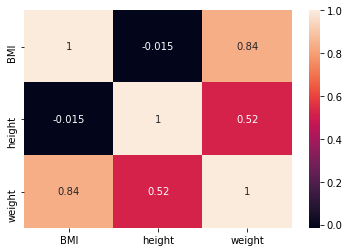

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()